In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE

%matplotlib inline

In [2]:
# train and test datasets
train_csv = pd.read_csv('../input/application_train.csv.zip', compression='infer')
test_csv = pd.read_csv('../input/application_test.csv.zip', compression='infer')

# balance information
credit_card_balance = pd.read_csv('../input/credit_card_balance.csv.zip', compression='infer')
bureau_balance = pd.read_csv('../input/bureau_balance.csv.zip', compression='infer')
cash_balance = pd.read_csv('../input/POS_CASH_balance.csv.zip', compression='infer')

# histoy data
installments = pd.read_csv('../input/installments_payments.csv.zip', compression='infer')
previous = pd.read_csv('../input/previous_application.csv.zip', compression='infer')

In [3]:
# removing 5 rows
train_csv = train_csv[train_csv['NAME_INCOME_TYPE'] != 'Maternity leave']

# removing 4 rows
train_csv = train_csv[train_csv['NAME_FAMILY_STATUS'] != 'Unknown']

# removing 2 rows
train_csv = train_csv[train_csv['CODE_GENDER'] != 'XNA']

In [4]:
# assigning X,y
X = pd.get_dummies(train_csv.drop(['TARGET','SK_ID_CURR'], axis=1), dummy_na=True)
y = train_csv['TARGET']

# assigning test
test = pd.get_dummies(test_csv.drop('SK_ID_CURR',axis=1), dummy_na=True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [6]:
sm = SMOTE(ratio = 1.0, n_jobs=8)
X_train_res, y_train_res = sm.fit_sample(X_train.fillna(0), y_train)

In [24]:
train_csv['TARGET'].value_counts()

0    282677
1     24823
Name: TARGET, dtype: int64

In [7]:
forest = RandomForestClassifier(n_estimators=200)

In [8]:
forest.fit(X_train_res, y_train_res)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
predictions = forest.predict(X_test.fillna(0))
pred_prob = forest.predict_proba(X_test.fillna(0))

In [11]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.92      1.00      0.96     93234
          1       0.60      0.00      0.00      8241

avg / total       0.89      0.92      0.88    101475



In [12]:
print(confusion_matrix(y_test, predictions))

[[93232     2]
 [ 8238     3]]


In [13]:
roc_auc_score(y_test, pred_prob[:,1])

0.6991457719119061

In [14]:
fpr, tpr, thresholds = roc_curve(y_test, pred_prob[:,1])

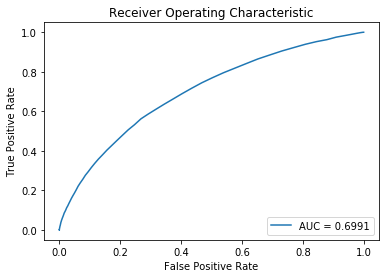

In [15]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr, label='AUC = %0.4f'% roc_auc_score(y_test, pred_prob[:,1]))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')

In [16]:
pred_sub = forest.predict_proba(test.fillna(0))

submission = pd.DataFrame()
submission['TARGET'] = pred_sub[:,1]
submission.index = test_csv['SK_ID_CURR']

In [17]:
submission.to_csv('forest-smote.csv')

In [18]:
summary = pd.Series(forest.feature_importances_)
summary.index = X.columns

In [19]:
summary.sort_values(ascending=False, inplace=True)

In [20]:
summary

CODE_GENDER_F                                        3.594212e-02
CODE_GENDER_M                                        3.089757e-02
EXT_SOURCE_3                                         2.779374e-02
FLAG_OWN_CAR_Y                                       2.621059e-02
EXT_SOURCE_2                                         2.586355e-02
HOUSETYPE_MODE_nan                                   2.312823e-02
FLAG_OWN_CAR_N                                       2.122638e-02
YEARS_BEGINEXPLUATATION_MODE                         2.025947e-02
NAME_FAMILY_STATUS_Married                           2.019267e-02
NAME_EDUCATION_TYPE_Higher education                 2.007249e-02
NAME_EDUCATION_TYPE_Secondary / secondary special    1.927403e-02
EMERGENCYSTATE_MODE_No                               1.891734e-02
YEARS_BEGINEXPLUATATION_MEDI                         1.815309e-02
EMERGENCYSTATE_MODE_nan                              1.792562e-02
HOUSETYPE_MODE_block of flats                        1.723516e-02
NAME_INCOM